   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  Species  
0  Setosa  
1  Setosa  
2  Setosa  
3  Setosa  
4  Setosa  
Logistic Regression Accuracy: 1.00
Classification Report for Logistic Regression:
              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        10
  Versicolor       1.00      1.00      1.00         9
   Virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00  

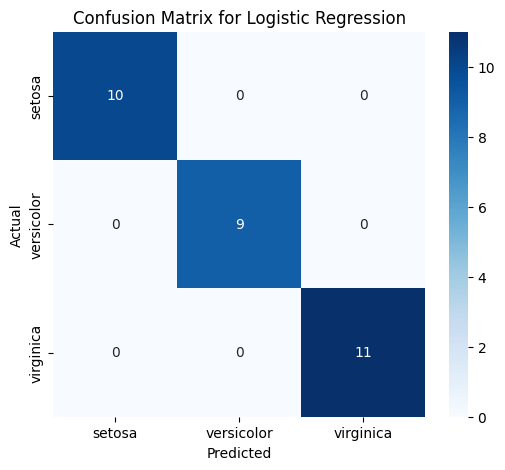

Random Forest Accuracy: 1.00
Confusion Matrix for Random Forest:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


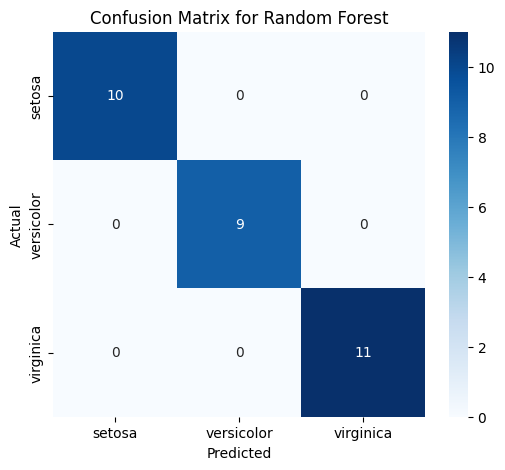

['iris_logreg_model.pkl']

In [ ]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Step 2: Load the Dataset (using the iris dataset from sklearn)
from sklearn.datasets import load_iris

# Load the dataset
iris = load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data['Species'] = iris.target
data['Species'] = data['Species'].map({0: 'Setosa', 1: 'Versicolor', 2: 'Virginica'})

# Display first 5 rows of the dataset
print(data.head())

# Step 3: Data Preprocessing
# Separate the features (X) and target variable (y)
X = data.iloc[:, :-1]  # Features (all columns except 'Species')
y = data['Species']    # Target variable ('Species')

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (optional but often helps with performance)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 4: Train the Model
# You can try different models such as Logistic Regression or Random Forest

# Logistic Regression Model
logreg_model = LogisticRegression()
logreg_model.fit(X_train_scaled, y_train)

# Step 5: Make Predictions
y_pred_logreg = logreg_model.predict(X_test_scaled)

# Step 6: Evaluate the Model
# Accuracy Score
logreg_accuracy = accuracy_score(y_test, y_pred_logreg)
print(f"Logistic Regression Accuracy: {logreg_accuracy:.2f}")

# Classification Report
print("Classification Report for Logistic Regression:")
print(classification_report(y_test, y_pred_logreg))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_logreg)
print("Confusion Matrix:")
print(conf_matrix)

# Plotting the Confusion Matrix as Heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Alternatively, you can train a Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Predictions using Random Forest
y_pred_rf = rf_model.predict(X_test_scaled)

# Accuracy of Random Forest
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {rf_accuracy:.2f}")

# Confusion Matrix for Random Forest
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix for Random Forest:")
print(conf_matrix_rf)

# Plotting the Confusion Matrix for Random Forest as Heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title('Confusion Matrix for Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# You can also save the model to use for future predictions
import joblib
joblib.dump(logreg_model, 'iris_logreg_model.pkl')


In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
import joblib

# Load the Iris dataset
iris = load_iris()

# Prepare the data
X = iris.data
y = iris.target

# Train a Logistic Regression model
logreg_model = LogisticRegression()
logreg_model.fit(X, y)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Function to get input from the user and predict the species
def identify_species():
    # Get user input
    sepal_length = float(input("Enter Sepal Length (in cm): "))
    sepal_width = float(input("Enter Sepal Width (in cm): "))
    petal_length = float(input("Enter Petal Length (in cm): "))
    petal_width = float(input("Enter Petal Width (in cm): "))

    # Create a numpy array from the input data
    input_data = np.array([[sepal_length, sepal_width, petal_length, petal_width]])

    # Scale the input data using the previously fitted scaler
    input_scaled = scaler.transform(input_data)

    # Make a prediction using the trained model
    prediction = logreg_model.predict(input_scaled)

    # Map the prediction back to the species name
    species_map = {0: 'Setosa', 1: 'Versicolor', 2: 'Virginica'}
    predicted_species = species_map[prediction[0]]

    # Print the predicted species
    print(f"The predicted species for the given measurements is: {predicted_species}")

# Call the function to make predictions based on user input
identify_species()


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Enter Sepal Length (in cm):  5.1
Enter Sepal Width (in cm): 3.5
Enter Petal Length (in cm): 1.4
Enter Petal Width (in cm): 0.2
The predicted species for the given measurements is: Setosa
